### Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset



#####Using Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Load Fashion MNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [3]:
test_dataset

Dataset QMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [4]:
print("Length of Training dataset: ", len(train_dataset))
print("Length of Test dataset: ", len(test_dataset))


Length of Training dataset:  60000
Length of Test dataset:  60000


In [5]:
classes_list = train_dataset.classes

# Print all the classes
print("Classes in the QMNIST dataset:")
for i, class_name in enumerate(classes_list):
    print(f"Class {i}: {class_name}")

num_classes = len(train_dataset.classes)
num_classes

Classes in the QMNIST dataset:
Class 0: 0 - zero
Class 1: 1 - one
Class 2: 2 - two
Class 3: 3 - three
Class 4: 4 - four
Class 5: 5 - five
Class 6: 6 - six
Class 7: 7 - seven
Class 8: 8 - eight
Class 9: 9 - nine


10

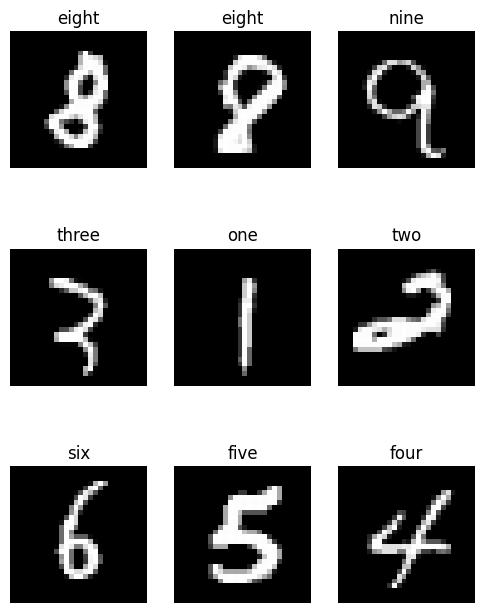

In [6]:
labels_map = {
    0: "zero",
    1: "one",
    2: "two",
    3: "three",
    4: "four",
    5: "five",
    6: "six",
    7: "seven",
    8: "eight",
    9: "nine",
}
figure = plt.figure(figsize=(6, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

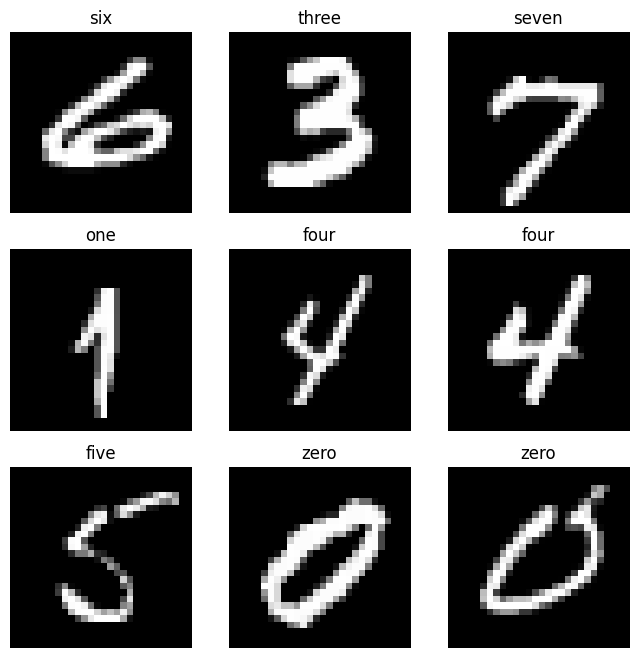

In [7]:
#Test DataSet
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {(correct / total) * 100}%')
            running_loss = 0.0
            #correct = 0
            #total = 0

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}')

# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()



Epoch 1, Batch 100, Loss: 0.9949914893507957, Accuracy: 71.578125%
Epoch 1, Batch 200, Loss: 0.4276351483166218, Accuracy: 79.3984375%
Epoch 1, Batch 300, Loss: 0.37379729077219964, Accuracy: 82.49479166666667%
Epoch 1, Batch 400, Loss: 0.3554255084693432, Accuracy: 84.1796875%
Epoch 1, Batch 500, Loss: 0.3189141443371773, Accuracy: 85.465625%
Epoch 1, Batch 600, Loss: 0.29965013548731806, Accuracy: 86.3984375%
Epoch 1, Batch 700, Loss: 0.2731248170882463, Accuracy: 87.20535714285714%
Epoch 1, Batch 800, Loss: 0.2762065387517214, Accuracy: 87.802734375%
Epoch 1, Batch 900, Loss: 0.2507718665897846, Accuracy: 88.34548611111111%
Epoch 2, Batch 100, Loss: 0.21721127383410932, Accuracy: 93.703125%
Epoch 2, Batch 200, Loss: 0.21762129679322242, Accuracy: 93.5546875%
Epoch 2, Batch 300, Loss: 0.21418951533734798, Accuracy: 93.63020833333333%
Epoch 2, Batch 400, Loss: 0.21242687202990054, Accuracy: 93.6328125%
Epoch 2, Batch 500, Loss: 0.18730490952730178, Accuracy: 93.7875%
Epoch 2, Batch 60

### Step 3. Report on the results in terms of prediction accuracy on the train and test datasets



- As a result of using the QMNIST dataset, the training accuracy is 97.07% and the loss is 0.10 based on the training accuracy.

- Testing accuracy with linear function and neural activation using 128 neurons is 96%, using linear function and neural activation

### Step 4. Choose one of the proposed modifications below:

- Add another Dense layer of 128 nodes
- Increase the current number of nodes in the layer to 256

Hypothesize how it would change the performance results


### Step 5. Modify the model based on the chosen method and train



### Adding new layer
Add another Dense layer of 128 nodes

Epoch 1, Batch 100, Loss: 1.0851097109913825, Accuracy: 66.171875%
Epoch 1, Batch 200, Loss: 0.4863400891423225, Accuracy: 75.390625%
Epoch 1, Batch 300, Loss: 0.3743810993432999, Accuracy: 79.82291666666667%
Epoch 1, Batch 400, Loss: 0.3200537845492363, Accuracy: 82.4765625%
Epoch 1, Batch 500, Loss: 0.2788253467530012, Accuracy: 84.3%
Epoch 1, Batch 600, Loss: 0.28871671557426454, Accuracy: 85.4296875%
Epoch 1, Batch 700, Loss: 0.23890170246362685, Accuracy: 86.50892857142857%
Epoch 1, Batch 800, Loss: 0.25601040966808797, Accuracy: 87.21484375%
Epoch 1, Batch 900, Loss: 0.20819886080920696, Accuracy: 87.95138888888889%
Epoch 2, Batch 100, Loss: 0.19668005488812923, Accuracy: 93.921875%
Epoch 2, Batch 200, Loss: 0.17612084228545427, Accuracy: 94.2578125%
Epoch 2, Batch 300, Loss: 0.18782300164923071, Accuracy: 94.35416666666666%
Epoch 2, Batch 400, Loss: 0.18540366040542722, Accuracy: 94.29296875%
Epoch 2, Batch 500, Loss: 0.17829485129565, Accuracy: 94.3%
Epoch 2, Batch 600, Loss: 0

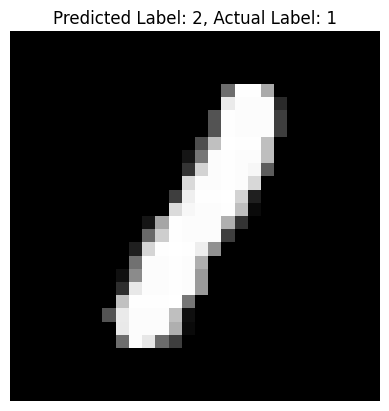

In [9]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128) # added extra layer
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x)) # added extra layer
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the neural network
model = MLP()
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        running_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {(correct / total) * 100}%')
            running_loss = 0.0
            #correct = 0
            #total = 0

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Get one test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

### Step 6. Report on the results of the modified model and if it matches your hypothesis



- After adding the extra layer on top of the existing layer, the result remains the same.



### Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

## Experiment 1

Epoch 1, Batch 100, Loss: 0.9238064688444138, Accuracy: 72.828125%
Epoch 1, Batch 200, Loss: 0.4201179736852646, Accuracy: 79.9375%
Epoch 1, Batch 300, Loss: 0.3423579519987106, Accuracy: 83.22395833333334%
Epoch 1, Batch 400, Loss: 0.3342956382036209, Accuracy: 84.890625%
Epoch 1, Batch 500, Loss: 0.3030623526126146, Accuracy: 86.1375%
Epoch 1, Batch 600, Loss: 0.27388244539499285, Accuracy: 87.06510416666666%
Epoch 1, Batch 700, Loss: 0.2576105745881796, Accuracy: 87.8125%
Epoch 1, Batch 800, Loss: 0.22100332587957383, Accuracy: 88.490234375%
Epoch 1, Batch 900, Loss: 0.21839447356760502, Accuracy: 89.04340277777779%
Epoch 2, Batch 100, Loss: 0.19915669806301595, Accuracy: 93.5%
Epoch 2, Batch 200, Loss: 0.16938122985884546, Accuracy: 94.171875%
Epoch 2, Batch 300, Loss: 0.17787965100258588, Accuracy: 94.16666666666667%
Epoch 2, Batch 400, Loss: 0.16266564102843403, Accuracy: 94.35546875%
Epoch 2, Batch 500, Loss: 0.17242388010025025, Accuracy: 94.41874999999999%
Epoch 2, Batch 600, 

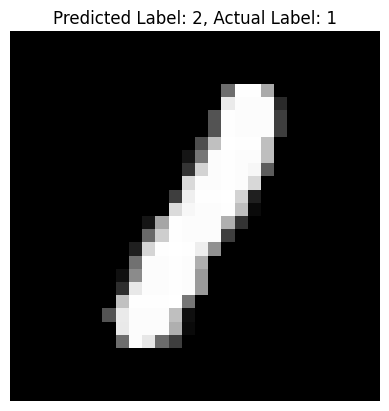

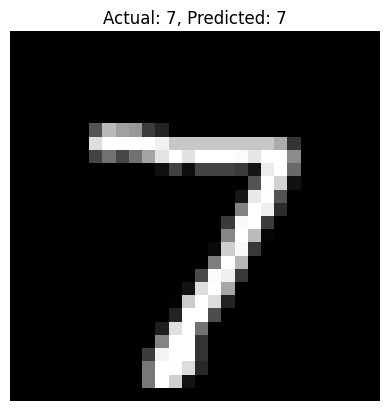

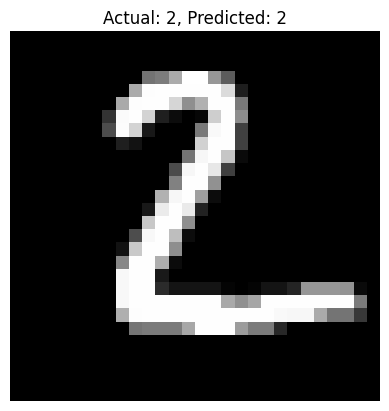

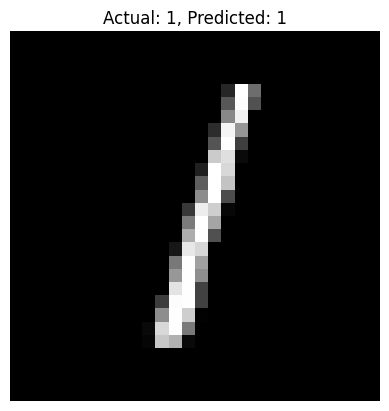

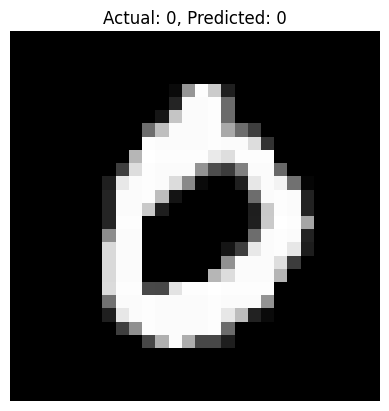

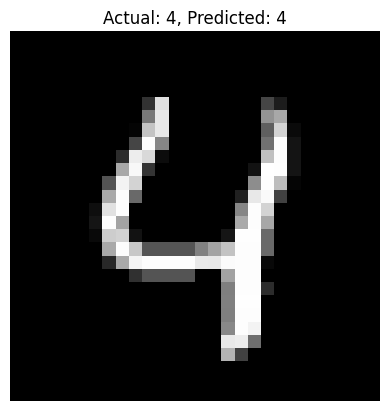

In [13]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256) # Changed dense layers to 256
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        running_loss += loss.item()
        total += labels.size(0)

        correct += (predicted == labels).sum().item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {(correct / total) * 100}%')
            running_loss = 0.0
            #correct = 0
            #total = 0

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Get one test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

# Get the first 5 images from the test set.  # modified Code and predicted
images, labels = next(iter(test_loader))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Convert to numpy arrays
images = images.numpy()
labels = labels.numpy()
predicted = predicted.numpy()

# Plot the images along with their actual and predicted labels
for i in range(5):
    image = images[i].squeeze()
    actual_label = labels[i]
    predicted_label = predicted[i]

    plt.imshow(image, cmap='gray')
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

- There was a slight improvement in accuracy in both the train and test data when the number of neurons was increased to 256. This improvement was seen in both train and test data.

- There has also been a decrease in loss

## Experiment 2





Epoch 1, Batch 100, Loss: 1.2803309828042984, Accuracy: 56.796875%
Epoch 1, Batch 200, Loss: 0.6989705845713615, Accuracy: 67.0078125%
Epoch 1, Batch 300, Loss: 0.6095376363396645, Accuracy: 71.21875%
Epoch 1, Batch 400, Loss: 0.5578353050351142, Accuracy: 73.9375%
Epoch 1, Batch 500, Loss: 0.5504572346806527, Accuracy: 75.546875%
Epoch 1, Batch 600, Loss: 0.5353871883451938, Accuracy: 76.7109375%
Epoch 1, Batch 700, Loss: 0.4857624024152756, Accuracy: 77.79241071428571%
Epoch 1, Batch 800, Loss: 0.48564998775720597, Accuracy: 78.59765625%
Epoch 1, Batch 900, Loss: 0.47453646689653395, Accuracy: 79.28472222222223%
Epoch 2, Batch 100, Loss: 0.4504400670528412, Accuracy: 85.609375%
Epoch 2, Batch 200, Loss: 0.4445165528357029, Accuracy: 85.65625%
Epoch 2, Batch 300, Loss: 0.4290451364219189, Accuracy: 85.83854166666667%
Epoch 2, Batch 400, Loss: 0.42588591322302816, Accuracy: 85.90625%
Epoch 2, Batch 500, Loss: 0.43502714425325395, Accuracy: 85.91250000000001%
Epoch 2, Batch 600, Loss: 0

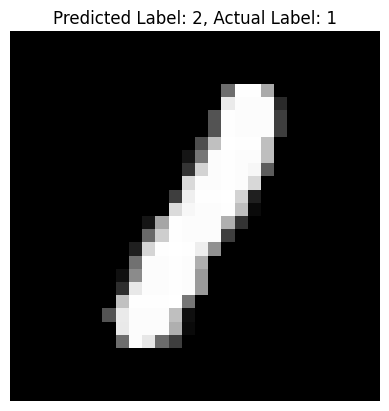

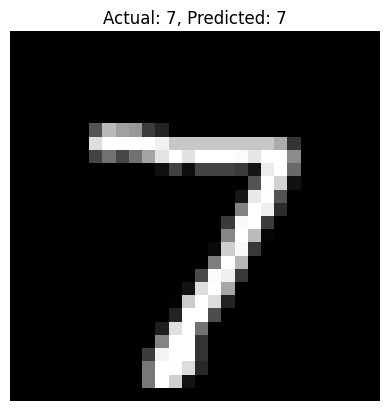

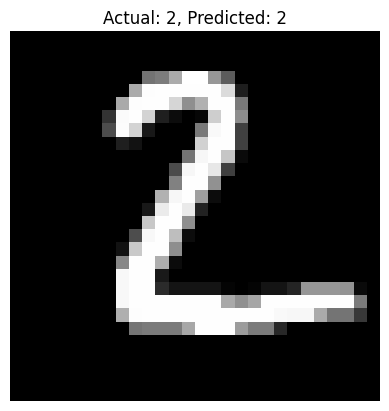

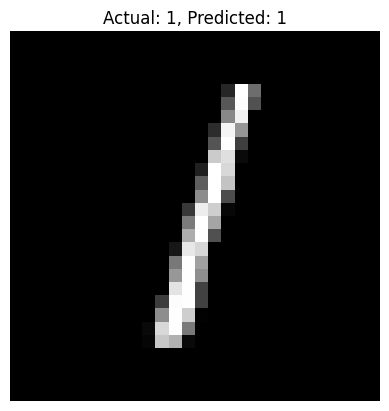

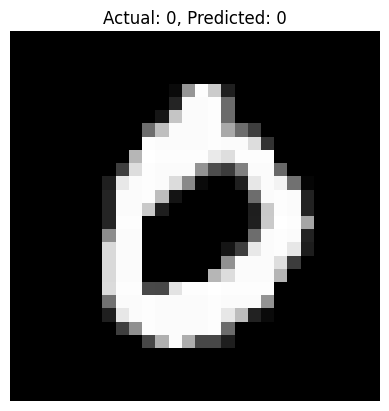

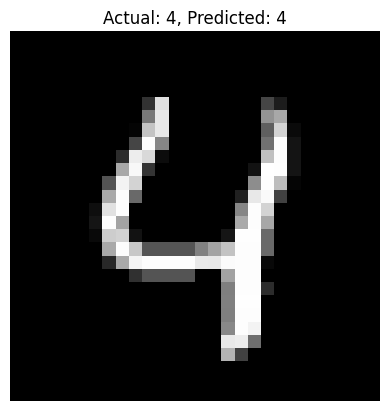

In [15]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256) # Changed dense layers to 256
        self.dropout1 = nn.Dropout(0.5) # Adding Dropout of 0.5
        self.fc2 = nn.Linear(256, 64)
        self.dropout1 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.dropout1(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        running_loss += loss.item()
        total += labels.size(0)

        correct += (predicted == labels).sum().item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {(correct / total) * 100}%')
            running_loss = 0.0
            #correct = 0
            #total = 0

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Get one test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

# Get the first 5 images from the test set.  # modified Code and predicted
images, labels = next(iter(test_loader))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Convert to numpy arrays
images = images.numpy()
labels = labels.numpy()
predicted = predicted.numpy()

# Plot the images along with their actual and predicted labels
for i in range(5):
    image = images[i].squeeze()
    actual_label = labels[i]
    predicted_label = predicted[i]

    plt.imshow(image, cmap='gray')
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

- In both train and test modes, a slight decrease in accuracy was observed when the dropout was added between the layers. One potential reason for the decrease in accuracy could be the regularization effect of dropout. Dropout randomly deactivates a certain percentage of neurons during training, which can lead to the model being less reliant on specific features and more robust to noise in the data. However, this regularization effect might also cause the model to lose some important information, resulting in a slight decrease in accuracy.

- In addition to this, it has also been observed that test accuracy is better than train accuracy.

## Experiment 3

Epoch 1, Batch 100, Loss: 2.2491707229614257, Accuracy: 18.0%
Epoch 1, Batch 200, Loss: 1.7101383090019227, Accuracy: 30.703124999999996%
Epoch 1, Batch 300, Loss: 1.1991401773691177, Accuracy: 40.739583333333336%
Epoch 1, Batch 400, Loss: 0.9817709988355636, Accuracy: 47.77734375%
Epoch 1, Batch 500, Loss: 0.7976059752702713, Accuracy: 53.403124999999996%
Epoch 1, Batch 600, Loss: 0.7238050413131714, Accuracy: 57.45572916666667%
Epoch 1, Batch 700, Loss: 0.6378152370452881, Accuracy: 60.89285714285714%
Epoch 1, Batch 800, Loss: 0.6065379667282105, Accuracy: 63.50781250000001%
Epoch 1, Batch 900, Loss: 0.5745671060681343, Accuracy: 65.63368055555556%
Epoch 2, Batch 100, Loss: 0.5225368362665176, Accuracy: 85.0%
Epoch 2, Batch 200, Loss: 0.5235505259037018, Accuracy: 84.8828125%
Epoch 2, Batch 300, Loss: 0.4914131364226341, Accuracy: 84.97916666666666%
Epoch 2, Batch 400, Loss: 0.48832022950053217, Accuracy: 85.33203125%
Epoch 2, Batch 500, Loss: 0.4793042296171188, Accuracy: 85.534375%

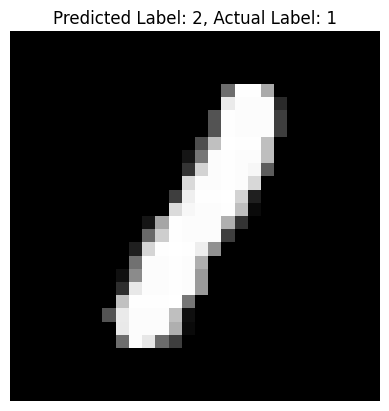

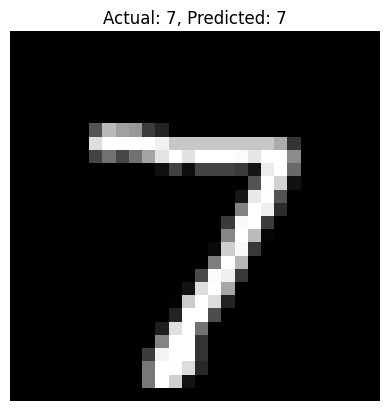

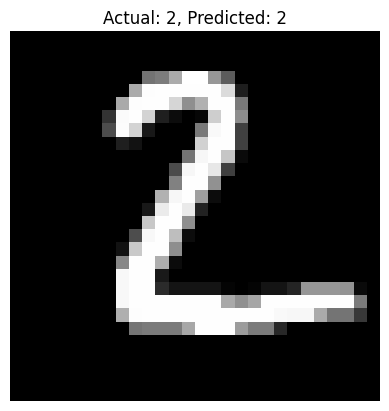

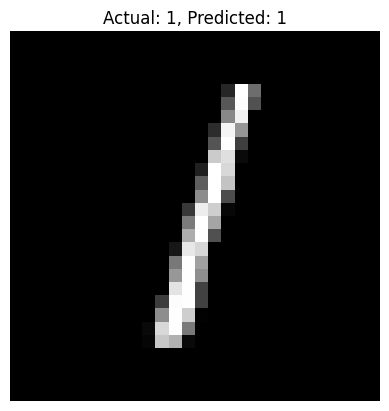

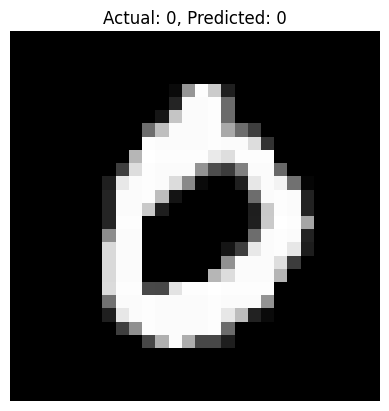

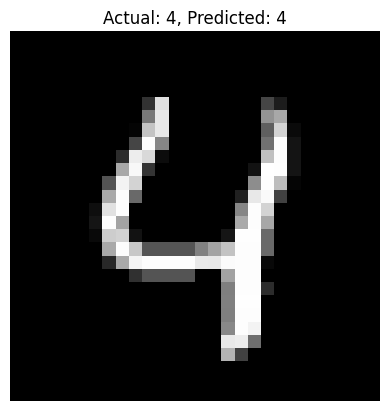

In [25]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256) # Changed dense layers to 256
        self.dropout1 = nn.Dropout(0.5) # Adding Dropout of 0.5
        self.fc2 = nn.Linear(256, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.dropout1(torch.relu(self.fc1(x)))
        x = self.dropout2(torch.sigmoid(self.fc2(x)))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Changed optimizer of SGD and added momentum

# Train the neural network
num_epochs = 10    # Increased epochs to 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        running_loss += loss.item()
        total += labels.size(0)

        correct += (predicted == labels).sum().item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {(correct / total) * 100}%')
            running_loss = 0.0
            #correct = 0
            #total = 0

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Get one test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

# Get the first 5 images from the test set.  # modified Code and predicted
images, labels = next(iter(test_loader))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Convert to numpy arrays
images = images.numpy()
labels = labels.numpy()
predicted = predicted.numpy()

# Plot the images along with their actual and predicted labels
for i in range(5):
    image = images[i].squeeze()
    actual_label = labels[i]
    predicted_label = predicted[i]

    plt.imshow(image, cmap='gray')
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

- The accuracy of the model has been decreased by 91% when compared to the accuracy of the model with 5 epochs of training method when the activation function has been changed to sigmoid, momentum was added to SGD, and the optimizer was added to SGD.


- However, the accuracy of the test wasn't affected much.


- There was an increase in the accuracy to 94% after increasing the number of epochs to 10 and a similar increase in the test accuracy to 96% after increasing the number of epochs to 10.

# Hypothese

The learning rate of the relu activation function is 0.001 for this dataset and it is recommended that 256 neurons are used with a relu activation function. Using 256 neurons with a relu activation function allows for a more complex and flexible representation of the dataset. This increased capacity can enable the neural network to learn and capture more intricate patterns and relationships within the data, potentially leading to improved model performance and accuracy. It can be seen from the experiment that the combination of these produces the best results.
